In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('../../data/personagens.csv')
data.head()

Esta_na_Capa    Grupo        Subgrupo  Primeiro_Capitulo  Ultimo_Capitulo  \
0             0  Pirates  Alvida Pirates                  0                0   
1             0  Marines         Captain                  0                0   
2             1  Pirates          Others                  1                1   
3             0  Animals   Organ Islands                  0                0   
4             0  Pirates  Alvida Pirates                  0                0   

   Porcentagem_de_Capitulos_do_Volume  E_a_Primeira_Aparicao_no_manga  \
0                                0.00                               1   
1                                0.00                               1   
2                                0.25                               1   
3                                0.00                               1   
4                                0.00                               1   

   Distancia_da_Primeira_Aparicao_em_capitulos  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   Numero_total_de_capitulos_que_apareceu  Numero_de_capitulos_ate_o_volume  \
0                                       1                                 0   
1                                       5                                 0   
2                                       2                                 0   
3                                       1                                 0   
4                                       1                                 0   

  Nome_do_Personagem    Volume  Numero_de_Capitulos_no_Volume  \
0             Alvida  Volume_1                              1   
1             Morgan  Volume_1                              5   
2               Nami  Volume_1                              2   
3              Pinky  Volume_1                              1   
4            Poppoko  Volume_1                              1   

   Distancia_da_Primeira_Aparicao_em_volumes  Volume_num  
0                                        0.0           1  
1                                        0.0           1  
2                                        0.0           1  
3                                        0.0           1  
4                                        0.0           1

In [7]:
# Dimensões do dataset
print(data.shape)
for col in data.columns:
    print(data[col].value_counts(), '\n')

(5336, 15)
Esta_na_Capa
0    4707
1     629
Name: count, dtype: int64 

Grupo
Pirates                      2338
Citizens                     1415
Marines                       340
Others                        308
World Government              198
Baroque Works                 122
Bounty Hunters                109
Animals                        96
Skypiea                        76
Shipwrights                    66
Sky Island                     56
Other                          35
Impel Down                     35
Baroque Works (disbanded)      28
Shichibukai                    26
Baroque Works (disbanded)      24
Kuja                           18
Seven Warlords of the Sea       9
Bandits                         8
Revolutionary Army              8
Four Emperors                   4
Revolutionaries                 4
Organizations                   3
Jaya                            3
Outlaws                         2
Flying Fish Riders              1
Animal Species                  1
Othe

<Axes: xlabel='count', ylabel='Grupo'>

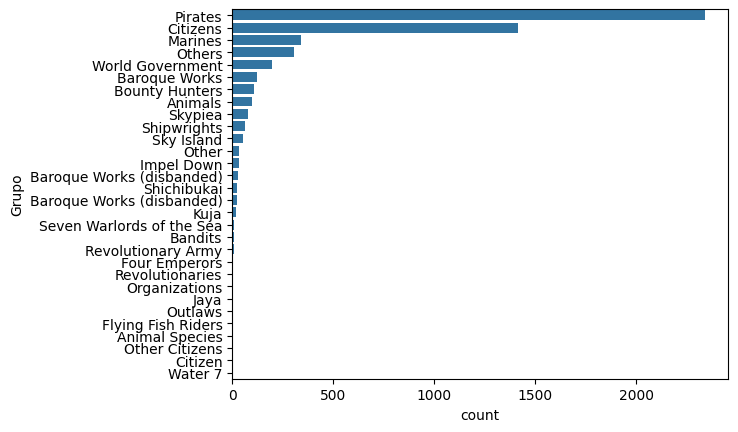

In [8]:
colunas = data.columns
# Bar plot Grupos
sns.countplot(data['Grupo'], order = data['Grupo'].value_counts().index)

In [9]:
data_mod = data.copy()
print(data_mod['Grupo'].value_counts())

Grupo
Pirates                      2338
Citizens                     1415
Marines                       340
Others                        308
World Government              198
Baroque Works                 122
Bounty Hunters                109
Animals                        96
Skypiea                        76
Shipwrights                    66
Sky Island                     56
Other                          35
Impel Down                     35
Baroque Works (disbanded)      28
Shichibukai                    26
Baroque Works (disbanded)      24
Kuja                           18
Seven Warlords of the Sea       9
Bandits                         8
Revolutionary Army              8
Four Emperors                   4
Revolutionaries                 4
Organizations                   3
Jaya                            3
Outlaws                         2
Flying Fish Riders              1
Animal Species                  1
Other Citizens                  1
Citizen                         1
Water 7 

In [10]:
# Unificando Grupos
pirates = ["Pirates", "Baroque Works", "Baroque Works (disbanded)", "Baroque Works (disbanded)",
            "Seven Warlords of the Sea", "Revolutionary Army", "Four Emperors", "Revolutionaries",
            "Shichibukai",  "Baroque Works\xa0(disbanded)", "Kuja"]
marines = ["Marines", "Bounty Hunter", "Impel Down", "Organizations", "Bounty Hunters",
           "World Government"]
citizens = ["Citizens", "Skypiea", "Shipwrights", "Sky Island", "Jaya", "Other Citizens",
            "Citizen", "Water 7"]
animals = ["Animals", "Animal Species"]
others = ["Flying Fish Riders", "Bandits", 'Others', 'Other', 'Outlaws']
for i in range(len(data_mod['Grupo'])):
    if data_mod['Grupo'][i] in pirates:
        data_mod['Grupo'][i] = 'Pirates'
    elif data_mod['Grupo'][i] in marines:
        data_mod['Grupo'][i] = 'Marines'
    elif data_mod['Grupo'][i] in citizens:
        data_mod['Grupo'][i] = 'Citizens'
    elif data_mod['Grupo'][i] in animals:
        data_mod['Grupo'][i] = 'Animals'
    elif data_mod['Grupo'][i] in others:
        data_mod['Grupo'][i] = 'Others'
print(data_mod['Grupo'].value_counts())

C:\Users\luisd\AppData\Local\Temp\ipykernel_4240\2356358698.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_mod['Grupo'][i] = 'Pirates'
C:\Users\luisd\AppData\Local\Temp\ipykernel_4240\2356358698.py:13: SettingWithCopyWarning: 
A v

Grupo
Pirates     2581
Citizens    1619
Marines      685
Others       354
Animals       97
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Grupo'>

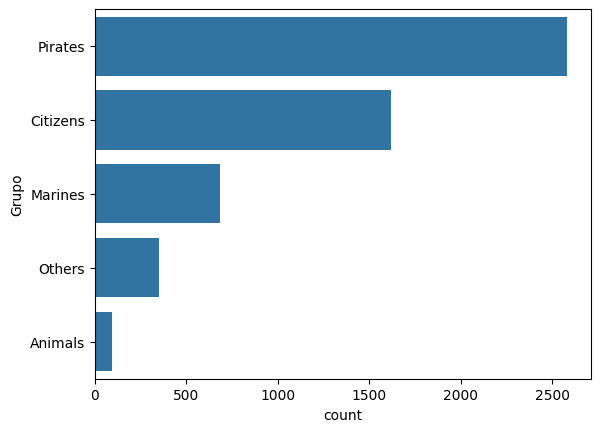

In [48]:
# Bar plot Grupos
sns.countplot(data_mod['Grupo'], order = data_mod['Grupo'].value_counts().index)

In [11]:
# salvar o dataset modificado
data_mod.to_csv('../../data/personagens_mod.csv', index=False)

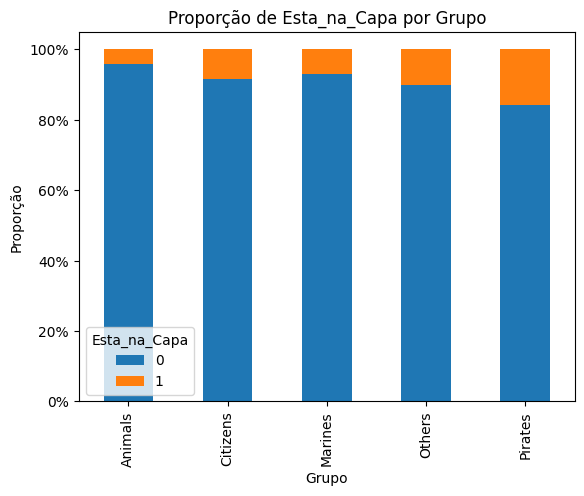

In [20]:
# Transformar Esta_na_Capa de int para categoria
data_mod['Esta_na_Capa'] = data_mod['Esta_na_Capa'].astype('category')
# Barras empilhadas Grupo e Esta_na_Capa
# Criar uma tabela cruzada para calcular as proporções
crosstab = pd.crosstab(data_mod['Grupo'], data_mod['Esta_na_Capa'], normalize='index')

ordered_groups = crosstab.sort_values(by=1, ascending=False).index

# Plotar o gráfico de barras empilhadas com proporções
crosstab.plot(kind='bar', stacked=True)

# Ajustar o gráfico para mostrar percentuais
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

plt.ylabel('Proporção')
plt.title('Proporção de Esta_na_Capa por Grupo')
plt.show()

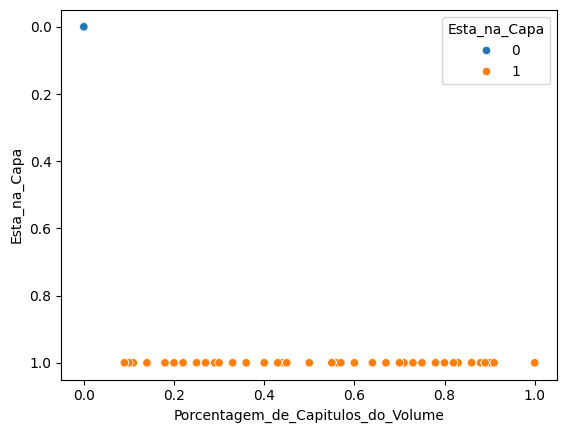

In [25]:
# scaterplot Porcentagem_de_Capitulos_do_Volume com contador de porcentagem e hue Esta_na_Capa
sns.scatterplot(data=data_mod, x='Porcentagem_de_Capitulos_do_Volume', y ="Esta_na_Capa",
                 hue='Esta_na_Capa')
plt.show()